In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

In [2]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

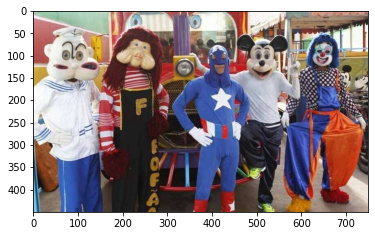

In [3]:
img = cv2.cvtColor(cv2.imread('image.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
'''aux = cv2.imread('image.jpg',cv2.IMREAD_UNCHANGED)
#aux = cv2.imread('ibagem.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(aux, (400, 400))
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()'''

"aux = cv2.imread('image.jpg',cv2.IMREAD_UNCHANGED)\n#aux = cv2.imread('ibagem.jpg',cv2.IMREAD_GRAYSCALE)\nimg = cv2.resize(aux, (400, 400))\nplt.figure(figsize=(10,10))\nplt.imshow(img)\nplt.show()"

In [5]:
red,green,blue = cv2.split(img)

In [6]:
blue

array([[182, 183, 183, ..., 126, 123, 120],
       [189, 188, 188, ..., 128, 120, 114],
       [180, 177, 175, ..., 122, 110, 100],
       ...,
       [231, 230, 226, ..., 144, 141, 141],
       [227, 229, 228, ..., 149, 151, 152],
       [227, 229, 228, ..., 149, 151, 152]], dtype=uint8)

In [7]:
#initialize PCA with first 20 principal components
pca = PCA(400)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
red_inverted

array([[168.90034536, 170.02081324, 168.04045602, ..., 208.99390968,
        209.06445555, 207.9856167 ],
       [177.18268686, 174.97399555, 174.89193643, ..., 208.97106571,
        204.92855132, 201.01185022],
       [170.83403541, 167.04809392, 165.09511928, ..., 201.09349696,
        192.02490187, 183.98269917],
       ...,
       [119.05005769, 118.0013726 , 116.96240761, ..., 174.98756248,
        173.07065117, 171.99183556],
       [117.00593728, 119.03726067, 118.92975384, ..., 180.99108396,
        183.96719015, 183.96246462],
       [116.9858676 , 118.96121354, 119.06336446, ..., 181.99203843,
        184.02692067, 185.03814414]])

In [8]:
corr_ord = pca.components_
corr_ord

array([[ 0.04145428,  0.04604264,  0.04590216, ...,  0.00486326,
         0.00398864,  0.00293098],
       [ 0.00676375,  0.01981068,  0.029754  , ..., -0.06627703,
        -0.06626848, -0.06638599],
       [-0.03282528, -0.02632576, -0.02432676, ...,  0.03275336,
         0.0360629 ,  0.03740631],
       ...,
       [ 0.00212013,  0.01657404, -0.05389061, ...,  0.00785511,
         0.0358203 , -0.04319123],
       [-0.05076655, -0.0154905 ,  0.0804901 , ...,  0.00748611,
         0.04348312, -0.01693151],
       [-0.04150348, -0.02260748, -0.02876499, ..., -0.0012913 ,
         0.00083655, -0.02135408]])

In [9]:
print(pca.explained_variance_)

[1.17352933e+06 5.09873737e+05 2.80691357e+05 2.00294043e+05
 1.35088488e+05 1.26507506e+05 9.15234857e+04 6.39745385e+04
 5.42430616e+04 5.23710857e+04 4.59115070e+04 3.71127049e+04
 3.56537174e+04 3.37622004e+04 2.87839830e+04 2.66696327e+04
 2.40210257e+04 2.28728774e+04 2.06812725e+04 1.82084666e+04
 1.68025143e+04 1.52227258e+04 1.32740756e+04 1.31097419e+04
 1.26612893e+04 1.14380603e+04 1.02419465e+04 9.95410515e+03
 9.12539677e+03 8.66900510e+03 8.47831572e+03 7.79060197e+03
 7.28547853e+03 6.95656861e+03 6.51550066e+03 6.39986651e+03
 6.26963350e+03 5.96954028e+03 5.85129209e+03 5.39779652e+03
 5.02604025e+03 4.94376705e+03 4.75553825e+03 4.53109228e+03
 4.34980730e+03 4.28156734e+03 4.13539850e+03 4.01858214e+03
 3.82827271e+03 3.74919886e+03 3.70439741e+03 3.56882559e+03
 3.41368155e+03 3.32704891e+03 3.27391636e+03 3.09810274e+03
 3.08074383e+03 2.98185617e+03 2.88073932e+03 2.83433243e+03
 2.80732686e+03 2.75517707e+03 2.61976132e+03 2.55556987e+03
 2.49808461e+03 2.400929

In [10]:
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [11]:
print(blue_transformed.shape)

(450, 400)


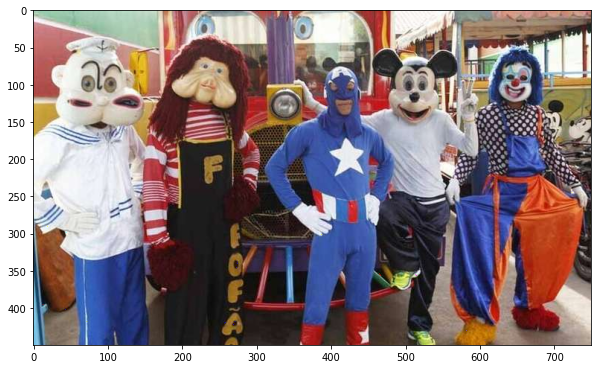

In [12]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(img_compressed)
plt.savefig('img_compre.png', format='png')

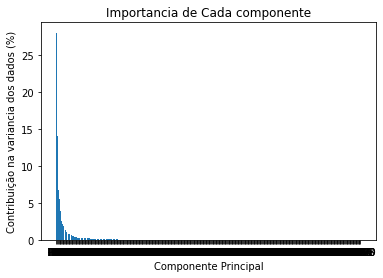

In [13]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados (%)')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()
# com PC1 e PC2 temos mais de 90% da variancia dos dados

In [14]:
print(per_var)

[28.  14.   8.8  6.7  5.5  3.9  3.3  2.5  2.1  1.8  1.6  1.5  1.3  1.1
  1.   1.   0.8  0.8  0.7  0.6  0.6  0.5  0.5  0.5  0.4  0.4  0.4  0.4
  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. 